<a href="https://colab.research.google.com/github/Aminata-lo/Aminata-lo/blob/main/project_economie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, svm




In [ ]:
price_riz = pd.read_csv("historic_groceries.csv", sep =',')

In [ ]:
price_riz.head(5)

In [ ]:
price_riz.tail(5)

In [ ]:
price_riz

 Pre-processing

In [ ]:
price_riz.info()

In [ ]:
price_riz.shape


In [ ]:
price_riz.values


In [ ]:
price_riz.duplicated()

In [ ]:
price_riz.describe()


In [ ]:
price_riz.isnull()


In [ ]:
price_riz.isnull().sum()


replacing missing values:
columns : sunflower-oil, pork, fish

In [ ]:
price_riz['Sunflower-oil'].mode()
price_riz['Pork'].mode()
price_riz['Fish'].mode()

In [ ]:
price_riz['Sunflower-oil'].mean()

In [ ]:
price_riz['Pork'].mean()

In [ ]:
price_riz['Fish'].mean()

In [ ]:
price_riz['Sunflower-oil'].fillna(price_riz['Sunflower-oil'].mean() , inplace=True)

price_riz['Pork'].fillna(price_riz['Pork'].mean() , inplace=True)

price_riz['Fish'].fillna(price_riz['Fish'].mean(), inplace=True)

In [ ]:
price_riz.isnull().sum()


In [ ]:
price_riz.info()

In [ ]:
encoder = LabelEncoder()

price_riz['Month'] = encoder.fit_transform(price_riz['Month'])

In [ ]:
price_riz.describe()

In [ ]:
price_riz.columns


data viZ:

In [ ]:
price_riz2 = price_riz.query("Month == 'Oct-20'")
sns.lineplot(data=price_riz2 , x="Month", y="Rice")

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x="Month", y="Rice",
             data=price_riz)

In [ ]:

plt.title("histogramme du prix du riz")
plt.xlabel("Rice")
price_riz["Rice"].plot.hist()

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="Month", y="Rice", palette=["m", "g"],
            data=price_riz)
sns.despine(offset=10, trim=True)

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 20 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 9 }

        ) 

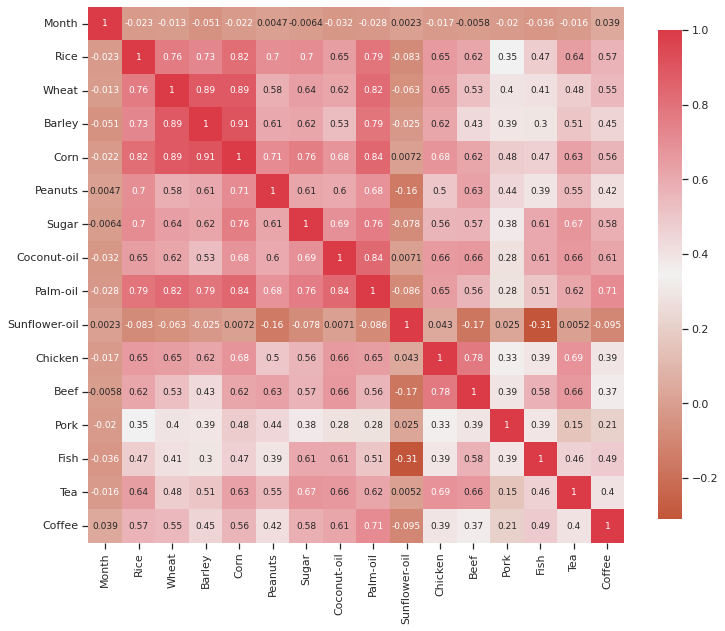

In [ ]:
plot_correlation_map(price_riz)

features selection:
Month,
substituable prod:'Wheat', 'Barley', 'Corn'
complementaire prod:'Palm-oil', 'Chicken', 'Beef'

In [ ]:
#  6 : REGRESSION multi-LINEAIRE

X=price_riz[['Wheat','Barley', 'Corn','Palm-oil', 'Chicken', 'Beef','Month']]
Y=price_riz['Rice']
X_train, X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.15, random_state=10)

model=LinearRegression() 
model.fit(X_train,Y_train)
predicted=model.predict(X_test)
# performance

print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))

model.score(X, Y)

MSE 0.004351387020967112
R squared 0.7198009788549677


0.7280389558364513

In [ ]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [59]:
import numpy as np
import pandas as pd
from flask import Flask, request, render_template
from sklearn import preprocessing
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    feature_list = request.form.to_dict()
    feature_list = list(feature_list.values())
    feature_list = list(map(int, feature_list))
    final_features = np.array(feature_list).reshape(1, 12) 
    
    prediction = model.predict(final_features)
    output = int(prediction[0])
    if output == 1:
        text = ">50K"
    else:
        text = "<=50K"

    return render_template('index.html', prediction_text='le prix du riz est {}'.format(text))



In [63]:
if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored